In [6]:
import random
import numpy as np

In [7]:
# https://www.youtube.com/watch?v=KzJORp8bgqs
#refference video.

In [8]:
def euclidean_distance(a,b):
    return np.sqrt(((b[0]-a[0])**2)+((b[1] - a[1])**2))

def KMean(x,k,epochs):
    centroids = random.sample(x,k)  # initially start with random datapoints as cluster

    for _ in range(epochs):
        cluster = [[] for _ in range(k)] # create k number of clusters
        for point in x:
            dist = [euclidean_distance(point,cent) for cent in centroids] # find the distance between each cluster and datapoints
            cluster_ind = dist.index(min(dist)) # find the index of the smallest cluster
            cluster[cluster_ind].append(point) # add data to the cluster

        new_centroids = [] # update
        for clust in cluster:
            if clust:
                upd_cluster = [sum(i)/len(i) for i in zip(*clust)] # getting x and y for update and finding the mean by sum(x)/n and same for sum(y)/n
                new_centroids.append(upd_cluster) # adding updated centroids
            else:
                new_centroids.append(random.choice(x))
        if centroids == new_centroids: # if both centroids same break the loop
            break

        centroids = new_centroids # assigning new centroids for next iteration

    return centroids,cluster



In [12]:
x = [
    [2, 3], [3, 3], [3, 4],
    [8, 7], [8, 8], [7, 8],
    [1, 0], [0, 1], [1, 1]
]


In [13]:
centroids,cluster = KMean(x,3,100)

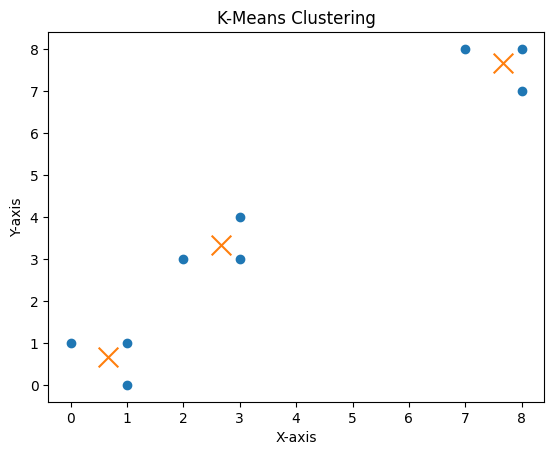

In [14]:
import matplotlib.pyplot as plt

# Separate x and y for points
x_points = [p[0] for p in x]
y_points = [p[1] for p in x]

# Separate x and y for centroids
x_centroids = [c[0] for c in centroids]
y_centroids = [c[1] for c in centroids]

plt.scatter(x_points, y_points)              # data points
plt.scatter(x_centroids, y_centroids, marker='x', s=200)  # centroids

plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("K-Means Clustering")
plt.show()
